In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset

dataset = pd.read_csv('wine.csv')

x = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [3]:
#splitting dataset into the Training and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 0)


#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
#Applying LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

print(x_train)
print(x_test)

[[ 3.57315552  1.94018924]
 [ 0.85475898 -2.08182977]
 [ 0.62173655 -3.06234453]
 [ 4.80786412  2.00638739]
 [-3.8579759   0.14987256]
 [-3.59455458  1.24961706]
 [-0.53772906 -3.0852704 ]
 [ 0.04058577 -2.47312446]
 [ 0.99835348 -3.36989668]
 [-3.74095658  1.94844242]
 [ 3.76035226  0.82126218]
 [-0.15106412 -1.86820292]
 [ 3.62762899  2.05460026]
 [-3.94229781  2.80328429]
 [ 3.33429017  0.73627798]
 [ 3.90206871  1.03276135]
 [-3.55835472  0.18783108]
 [ 5.63175281  2.40524214]
 [-5.56217254  0.85694946]
 [ 0.23296188 -3.94615581]
 [ 5.03141997  3.23313754]
 [ 3.52861651  0.94605778]
 [-1.17815662 -2.17294825]
 [ 3.58320131  0.67947364]
 [ 5.21649905  2.41090952]
 [-3.01647841  1.24411621]
 [ 1.86178658 -0.47484926]
 [ 3.93816398 -0.2204059 ]
 [-1.0836235  -3.32496762]
 [ 1.8691488  -0.63362283]
 [ 3.27717205  1.51263542]
 [-0.47842302 -1.16766723]
 [-4.14433134  1.37391708]
 [ 2.45009727 -2.49336285]
 [-1.20844631 -2.30679956]
 [ 2.55631466 -0.98550214]
 [-1.6091476   0.55066705]
 

In [10]:
# Fitting Logestic Regression to the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [11]:
# Predicting the test set result

y_pred = classifier.predict(x_test)

In [14]:
# Making the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)


# no incorect prediction in Confusion Matrix result (100% accuracy) 

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


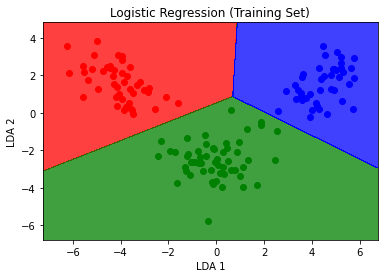

In [16]:
# Visualizing the training set Result

from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
         np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training Set)')    
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


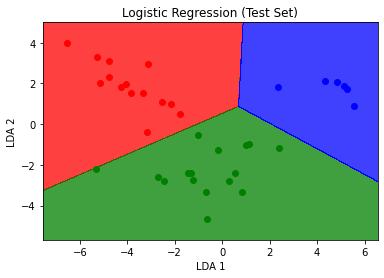

In [17]:
# Visualizing the Test set Result

from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
         np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Test Set)')    
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.show()